# We aim to predict the house prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Preprocessing and data cleaning:

### Let's explore the dataframe

### It's not a very big dataframe:

In [3]:
df.index

RangeIndex(start=0, stop=545, step=1)

In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## There is no null value:

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### It uses a very small amount of memory:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### There is no row with any negative value:

In [7]:
df["mainroad"] = LabelEncoder().fit_transform(df["mainroad"])
df["guestroom"] = LabelEncoder().fit_transform(df["guestroom"])
df["basement"] = LabelEncoder().fit_transform(df["basement"])
df["hotwaterheating"] = LabelEncoder().fit_transform(df["hotwaterheating"])
df["airconditioning"] = LabelEncoder().fit_transform(df["airconditioning"])
df["prefarea"] = LabelEncoder().fit_transform(df["prefarea"])
df["furnishingstatus"] = LabelEncoder().fit_transform(df["furnishingstatus"])
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1


### We want numbers in our dataframe so that we could pass it to models:

In [8]:
negative_rows =  df[(df < 0).any(axis=1)]
negative_rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [9]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

### We could see the mean value for columns to have a better understanding of the dataframe:

In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


### Let's take a look at houses with most greatest number of bedrooms sorted by their price:

In [11]:
df.sort_values(by=["bedrooms","price"], ascending = False).head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
112,6083000,4300,6,2,2,1,0,0,0,0,0,0,0
395,3500000,3600,6,1,2,1,0,0,0,0,1,0,2
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,2
34,8120000,6840,5,1,2,1,1,1,0,1,1,0,0


### Now let's see information about the very expensive houses which cost more than 8,000,000:

In [12]:
df[df["price"]>8000000].sort_values(by="price", ascending=False).head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [13]:
y = df["price"]
x = df.drop(columns=["price"])
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.25, random_state=42)

In [14]:
x_train.index 

Index([167, 368, 301, 527, 382, 235, 302, 460, 439,  19,
       ...
       330, 214, 466, 121,  20,  71, 106, 270, 435, 102],
      dtype='int64', length=408)

In [15]:
y_train.index

Index([167, 368, 301, 527, 382, 235, 302, 460, 439,  19,
       ...
       330, 214, 466, 121,  20,  71, 106, 270, 435, 102],
      dtype='int64', length=408)

## Ordinary least squares
### Since there wasn't any negtaive value in dataframe, we tend to use non-negative least squares:

In [16]:
linear_regr = LinearRegression(positive=True)
linear_regr.fit(x_train, y_train)
print("coef_:",linear_regr.coef_)
print("intercept:",linear_regr.intercept_)

coef_: [2.41819292e+02 7.53196888e+04 1.13596170e+06 4.02368953e+05
 4.14310535e+05 2.86937829e+05 4.41928701e+05 7.29493128e+05
 7.91194905e+05 2.74806607e+05 6.40659347e+05 0.00000000e+00]
intercept: -71632.62069035508


In [17]:
linear_regr_predictions = linear_regr.predict(x_test).astype(int)
pd.DataFrame(linear_regr_predictions).head(3)

,0
0,5449776
1,7051346
2,3008597


In [18]:
y_test.head(3)

316    4060000
77     6650000
360    3710000
Name: price, dtype: int64

In [19]:
least_squares_train_predictions = linear_regr.predict(x_train) 
least_squares_test_predictions = linear_regr.predict(x_test)
print("R2 score for train data is:",r2_score(y_train, least_squares_train_predictions))
print("R2 score for test data is:",r2_score(y_test, least_squares_test_predictions))

R2 score for train data is: 0.6769147452798607
R2 score for test data is: 0.6549615837553933


## Ridge regression:

### Alphas with linspace(this works better for linear relations):

In [20]:
alphas = np.linspace(0.1, 10, 100)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        store_cv_values=True)

In [21]:
ridge_train_predictions = ridge_cv.predict(x_train) 
ridge_test_predictions = ridge_cv.predict(x_test)
print("R2 score for train data is:",r2_score(y_train, ridge_train_predictions))
print("R2 score for test data is:",r2_score(y_test, ridge_test_predictions))

R2 score for train data is: 0.683140671870996
R2 score for test data is: 0.6598273442797289


In [22]:
best_alpha = ridge_cv.alpha_
best_alpha

4.7

### Alphas with logspace:

In [23]:
alphas = np.logspace(-50, 50, 101)
ridge_cv_logspace = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_logspace.fit(x_train, y_train)

RidgeCV(alphas=array([1.e-50, 1.e-49, 1.e-48, 1.e-47, 1.e-46, 1.e-45, 1.e-44, 1.e-43,
       1.e-42, 1.e-41, 1.e-40, 1.e-39, 1.e-38, 1.e-37, 1.e-36, 1.e-35,
       1.e-34, 1.e-33, 1.e-32, 1.e-31, 1.e-30, 1.e-29, 1.e-28, 1.e-27,
       1.e-26, 1.e-25, 1.e-24, 1.e-23, 1.e-22, 1.e-21, 1.e-20, 1.e-19,
       1.e-18, 1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11,
       1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04...
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13,
       1.e+14, 1.e+15, 1.e+16, 1.e+17, 1.e+18, 1.e+19, 1.e+20, 1.e+21,
       1.e+22, 1.e+23, 1.e+24, 1.e+25, 1.e+26, 1.e+27, 1.e+28, 1.e+29,
       1.e+30, 1.e+31, 1.e+32, 1.e+33, 1.e+34, 1.e+35, 1.e+36, 1.e+37,
       1.e+38, 1.e+39, 1.e+40, 1.e+41, 1.e+42, 1.e+43, 1.e+44, 1.e+45,
       1.e+46, 1.e+47, 1.e+48, 1.e+49, 1.e+50]),
        store_cv_values=True)

In [24]:
ridge_logspace_train_predictions = ridge_cv_logspace.predict(x_train) 
ridge_logspace_test_predictions = ridge_cv_logspace.predict(x_test)
print("R2 score for train data is:",r2_score(y_train, ridge_logspace_train_predictions))
print("R2 score for test data is:",r2_score(y_test, ridge_logspace_test_predictions))

R2 score for train data is: 0.6838738600855283
R2 score for test data is: 0.6611539459463378


In [25]:
best_alpha = ridge_cv_logspace.alpha_
best_alpha

1.0

## Lasso:

### Alphas with linspace:

In [26]:
alphas = np.linspace(0.1, 10, 100)
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(x_train, y_train)

LassoCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [27]:
lasso_train_predictions = lasso_cv.predict(x_train) 
lasso_test_predictions = lasso_cv.predict(x_test)
print("R2 score for train data is:",r2_score(y_train, lasso_train_predictions))
print("R2 score for test data is:",r2_score(y_test, lasso_test_predictions))

R2 score for train data is: 0.6839176601752495
R2 score for test data is: 0.6614579906260735


In [28]:
best_alpha = lasso_cv.alpha_
best_alpha

10.0

### Alphas with logspace:

In [29]:
alphas = np.logspace(0.1, 10, 100)
lasso_cv_logspace = LassoCV(alphas=alphas)
lasso_cv_logspace.fit(x_train, y_train)

LassoCV(alphas=array([1.25892541e+00, 1.58489319e+00, 1.99526231e+00, 2.51188643e+00,
       3.16227766e+00, 3.98107171e+00, 5.01187234e+00, 6.30957344e+00,
       7.94328235e+00, 1.00000000e+01, 1.25892541e+01, 1.58489319e+01,
       1.99526231e+01, 2.51188643e+01, 3.16227766e+01, 3.98107171e+01,
       5.01187234e+01, 6.30957344e+01, 7.94328235e+01, 1.00000000e+02,
       1.25892541e+02, 1.58489319e+0...
       5.01187234e+07, 6.30957344e+07, 7.94328235e+07, 1.00000000e+08,
       1.25892541e+08, 1.58489319e+08, 1.99526231e+08, 2.51188643e+08,
       3.16227766e+08, 3.98107171e+08, 5.01187234e+08, 6.30957344e+08,
       7.94328235e+08, 1.00000000e+09, 1.25892541e+09, 1.58489319e+09,
       1.99526231e+09, 2.51188643e+09, 3.16227766e+09, 3.98107171e+09,
       5.01187234e+09, 6.30957344e+09, 7.94328235e+09, 1.00000000e+10]))

In [30]:
lasso_logspace_train_predictions = lasso_cv_logspace.predict(x_train) 
lasso_logspace_test_predictions = lasso_cv_logspace.predict(x_test)
print("R2 score for train data is:",r2_score(y_train, lasso_logspace_train_predictions))
print("R2 score for test data is:",r2_score(y_test, lasso_logspace_test_predictions))

R2 score for train data is: 0.6838774216109428
R2 score for test data is: 0.6606649338783298


In [31]:
best_alpha = lasso_cv_logspace.alpha_
best_alpha

1584.893192461114

## Elastic-net:

### Alphas with linspace:

In [32]:
alphas = np.linspace(0.1, 10, 100)
elastic_net_cv = ElasticNetCV(alphas=alphas)
elastic_net_cv.fit(x_train, y_train)

ElasticNetCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [33]:
elastic_train_predictions = elastic_net_cv.predict(x_train) 
elastic_test_predictions = elastic_net_cv.predict(x_test)
elastic_train_score = r2_score(y_train, elastic_train_predictions)
elastic_test_score = r2_score(y_test, elastic_test_predictions)

In [34]:
best_alpha = elastic_net_cv.alpha_
best_alpha

0.1

### Alphas with logspace:

In [35]:
alphas = np.logspace(0.1, 10, 100)
elastic_net_logspace = ElasticNetCV(alphas=alphas)
elastic_net_logspace.fit(x_train, y_train)

ElasticNetCV(alphas=array([1.25892541e+00, 1.58489319e+00, 1.99526231e+00, 2.51188643e+00,
       3.16227766e+00, 3.98107171e+00, 5.01187234e+00, 6.30957344e+00,
       7.94328235e+00, 1.00000000e+01, 1.25892541e+01, 1.58489319e+01,
       1.99526231e+01, 2.51188643e+01, 3.16227766e+01, 3.98107171e+01,
       5.01187234e+01, 6.30957344e+01, 7.94328235e+01, 1.00000000e+02,
       1.25892541e+02, 1.584893...
       5.01187234e+07, 6.30957344e+07, 7.94328235e+07, 1.00000000e+08,
       1.25892541e+08, 1.58489319e+08, 1.99526231e+08, 2.51188643e+08,
       3.16227766e+08, 3.98107171e+08, 5.01187234e+08, 6.30957344e+08,
       7.94328235e+08, 1.00000000e+09, 1.25892541e+09, 1.58489319e+09,
       1.99526231e+09, 2.51188643e+09, 3.16227766e+09, 3.98107171e+09,
       5.01187234e+09, 6.30957344e+09, 7.94328235e+09, 1.00000000e+10]))

In [36]:
elastic_train_logspace_predictions = elastic_net_logspace.predict(x_train) 
elastic_test_logspace_predictions = elastic_net_logspace.predict(x_test)
elastic_train_logspace_score = r2_score(y_train, elastic_train_logspace_predictions)
elastic_test_logspace_score = r2_score(y_test, elastic_test_logspace_predictions)

In [37]:
best_alpha = elastic_net_logspace.alpha_
best_alpha

1.2589254117941673

## Comparing results:

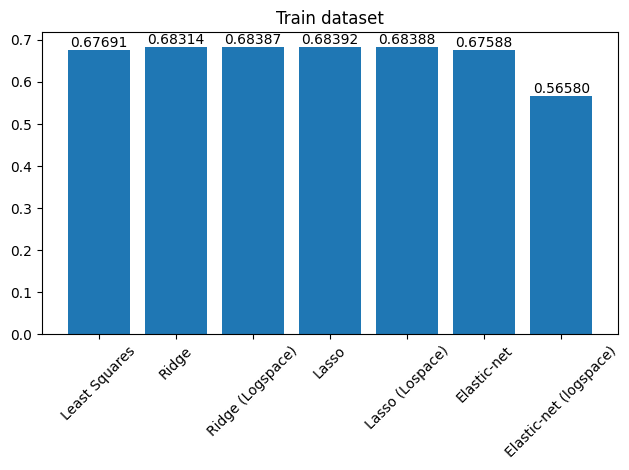

In [38]:
labels = ['Least Squares', 'Ridge', 'Ridge (Logspace)','Lasso','Lasso (Lospace)', 'Elastic-net', 'Elastic-net (logspace)']
results = [r2_score(y_train,least_squares_train_predictions), r2_score(y_train,ridge_train_predictions), r2_score(y_train,ridge_logspace_train_predictions),r2_score(y_train, lasso_train_predictions), r2_score(y_train, lasso_logspace_train_predictions), elastic_train_score, elastic_train_logspace_score]
fig, ax = plt.subplots()
ax.set_title("Train dataset")
fig.set_tight_layout(True)
bars = ax.bar(labels, results)
for bar in bars:
    yval = bar.get_height() 
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.5f}', 
            ha='center', va='bottom') 
    plt.xticks(rotation=45)

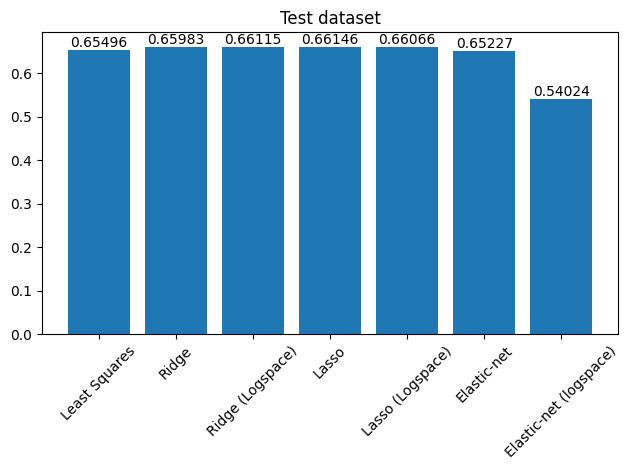

In [39]:
labels = ['Least Squares', 'Ridge', 'Ridge (Logspace)','Lasso','Lasso (Logspace)', 'Elastic-net', 'Elastic-net (logspace)']
results = [r2_score(y_test,least_squares_test_predictions), r2_score(y_test,ridge_test_predictions), r2_score(y_test,ridge_logspace_test_predictions),r2_score(y_test, lasso_test_predictions), r2_score(y_test, lasso_logspace_test_predictions), elastic_test_score, elastic_test_logspace_score]
fig, ax = plt.subplots()
ax.set_title("Test dataset")
fig.set_tight_layout(True)
bars = ax.bar(labels, results)
for bar in bars:
    yval = bar.get_height() 
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.5f}', 
            ha='center', va='bottom') 
    plt.xticks(rotation=45)